# Verkeersdata Analyse Porfolio

In [1]:
# Libraries inladen
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Datasets inladen
accidents = pd.read_csv("datasets/accident_data.csv", nrows=10000)
roads = pd.read_csv("datasets/road_data.csv", nrows=10000)
weather = pd.read_csv("datasets/weather_data.csv", nrows=10000)

## Onvolledige data verwijderen of aanvullen

In [3]:
# Overzicht Data
def overzicht(df, name):
    print(f"\n {name} \n")
    print("-------------------------")
    print(df.head())

overzicht(accidents, "Accident Data")
overzicht(weather, "Weather Data")
overzicht(roads, "Road Data")


 Accident Data 

-------------------------
          ID   Source  Severity                     Start_Time  \
0  A-2047758  Source2         2            2019-06-12 10:10:56   
1  A-4694324  Source1         2  2022-12-03 23:37:14.000000000   
2  A-5006183  Source1         2  2022-08-20 13:13:00.000000000   
3  A-4237356  Source1         2            2022-02-21 17:43:04   
4  A-6690583  Source1         2            2020-12-04 01:46:00   

                        End_Time  Start_Lat   Start_Lng    End_Lat  \
0            2019-06-12 10:55:58  30.641211  -91.153481        NaN   
1  2022-12-04 01:56:53.000000000  38.990562  -77.399070  38.990037   
2  2022-08-20 15:22:45.000000000  34.661189 -120.492822  34.661189   
3            2022-02-21 19:43:23  43.680592  -92.993317  43.680574   
4            2020-12-04 04:13:09  35.395484 -118.985176  35.395476   

      End_Lng  Distance(mi)  \
0         NaN         0.000   
1  -77.398282         0.056   
2 -120.492442         0.022   
3  -92.972223 

In [4]:
# Missende waarden detecteren
def missende_waardes(df, name):
    print(f"\n Missende waarden in: {name}")
    print((df.isnull().sum() / len(df) * 100))

missende_waardes(accidents, "Accident Data")
missende_waardes(weather, "Weather Data")
missende_waardes(roads, "Road Data")


 Missende waarden in: Accident Data
ID               0.00
Source           0.00
Severity         0.00
Start_Time       0.00
End_Time         0.00
Start_Lat        0.00
Start_Lng        0.00
End_Lat         44.68
End_Lng         44.68
Distance(mi)     0.00
Description      0.00
City             0.00
County           0.00
State            0.00
Zipcode          0.00
dtype: float64

 Missende waarden in: Weather Data
Start_Time            0.00
Weather_Timestamp     1.46
Temperature(F)        1.99
Wind_Chill(F)        25.97
Humidity(%)           2.09
Pressure(in)          1.68
Visibility(mi)        2.11
Wind_Direction        2.10
Wind_Speed(mph)       7.06
Precipitation(in)    28.75
Weather_Condition     2.12
Sunrise_Sunset        0.31
dtype: float64

 Missende waarden in: Road Data
ID                 0.0
Amenity            0.0
Bump               0.0
Crossing           0.0
Give_Way           0.0
Junction           0.0
No_Exit            0.0
Railway            0.0
Roundabout         0.0
Sta

### Accidents Data

In de kolommen End_lat en End_lng zitten ook heel veel missende waardes. Aangezien ik al de coordinaten van de incident locaties heb (Start_Lat - Start_Lng) heb ik deze twee kolommen niet nodig.

In [5]:
# End_Lat en End_Lng kolommen verwijderen met  veel missende waardes (indien niet nodig)
accidents.drop(['End_Lat', 'End_Lng'], axis=1, inplace=True)

In de description en city kolommen zitten heel weininig nan waardes, hierbij kunnen we heel makkelijk deze rijen veranderen, want het zal geen effect hebben op de analyse.

In [6]:
# Rijen met nan waardes verwijderen
accidents.dropna(subset=["Description", "City", "Zipcode"], inplace=True)

### Weather Data

In de kolom 'Precipitation(in)' zitten veel missende waarden. Aangezien waarschijnlijk in de meeste geval niet regenen of sneeuwen betekent dat er geen regen of sneeuw is gevallen, besloot ik om de missende waarden met '0.0' te invullen. Zo heb ik geen dataverlies en kan werken met deze kolom.

In [7]:
# None waardes veranderen met 0
weather.fillna({"Precipitation(in)": 0.0}, inplace=True)

Als je kijkt naar de Wind_Chill(F) kolom, zie je dat het meestaal heel dichtbij of soms helemaal hetzelfde is met de Temperature(F) kolom. Dit betekent dat de NaN waardes gewoon met de waardes van Temperature(F) opgevuld kan worden. Dit geldt ook voor de kolom Temperature(F).

In [8]:
weather[["Wind_Chill(F)","Temperature(F)"]].head()

,Wind_Chill(F),Temperature(F)
0,77.0,77.0
1,43.0,45.0
2,68.0,68.0
3,15.0,27.0
4,42.0,42.0


In [9]:
# Opvullen met dichtstbijzijnde waardes
weather.fillna({"Wind_Chill(F)": "Temperature(F)"}, inplace=True)
weather.fillna({"Temperature(F)": "Wind_Chill(F)"}, inplace=True)

Omdat de resterende kolommen heel weinig NaN waardes bevatten, kunnen de rijen met de NaN values gelijk werwijderd kan worden. Dit heeft geen effect op de analyse en de data begrijpelijker.

In [10]:
# De rijen met weinig missende waardes verwijderen
weather.dropna(subset=["Humidity(%)", "Pressure(in)" 
                       ,"Visibility(mi)", "Wind_Direction", 
                       "Wind_Speed(mph)", "Weather_Condition", "Sunrise_Sunset"], 
               inplace=True)

### Roads Data

In [11]:
weather.isnull().sum()

Start_Time           0
Weather_Timestamp    0
Temperature(F)       0
Wind_Chill(F)        0
Humidity(%)          0
Pressure(in)         0
Visibility(mi)       0
Wind_Direction       0
Wind_Speed(mph)      0
Precipitation(in)    0
Weather_Condition    0
Sunrise_Sunset       0
dtype: int64

Alle missende waardes zijn nu verwijderd.

In [12]:
missende_waardes(accidents, "Accident Data")
missende_waardes(weather, "Weather Data")
missende_waardes(roads, "Road Data")


 Missende waarden in: Accident Data
ID              0.0
Source          0.0
Severity        0.0
Start_Time      0.0
End_Time        0.0
Start_Lat       0.0
Start_Lng       0.0
Distance(mi)    0.0
Description     0.0
City            0.0
County          0.0
State           0.0
Zipcode         0.0
dtype: float64

 Missende waarden in: Weather Data
Start_Time           0.0
Weather_Timestamp    0.0
Temperature(F)       0.0
Wind_Chill(F)        0.0
Humidity(%)          0.0
Pressure(in)         0.0
Visibility(mi)       0.0
Wind_Direction       0.0
Wind_Speed(mph)      0.0
Precipitation(in)    0.0
Weather_Condition    0.0
Sunrise_Sunset       0.0
dtype: float64

 Missende waarden in: Road Data
ID                 0.0
Amenity            0.0
Bump               0.0
Crossing           0.0
Give_Way           0.0
Junction           0.0
No_Exit            0.0
Railway            0.0
Roundabout         0.0
Station            0.0
Stop               0.0
Traffic_Calming    0.0
Traffic_Signal     0.0
dtype

## Onnodige Kolommen verwijderen
Om de data overzichtelijk te houden, onnodig geheugengebruik te voorkomen en alleen met kolommen te werken die relevant zijn voor de analyse, is het handig om een paar overbodige kolommen te verwijderen.

In [13]:
# Accidents
accidents.drop(columns=[
    "Description", "Source", "Zipcode", "Distance(mi)"
]
               , inplace=True)

# Weather
weather.drop(columns=[
    "Start_Time", "Wind_Chill(F)", "Visibility(mi)", "Wind_Direction"
]
            , inplace=True)

In [14]:
print(weather.columns)
print("-------------")
print(accidents.columns)

Index(['Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition',
       'Sunrise_Sunset'],
      dtype='object')
-------------
Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'City', 'County', 'State'],
      dtype='object')


## Onrealistische waarden filtreren
Uitschieters of fout waardes verwijderen.

In [15]:
# Kijken of er foute waarden tussen zitten
def inzicht_waarden(df, name):
    print(f"{name} data:")
    print(df.describe())

inzicht_waarden(weather, "Weather")
inzicht_waarden(accidents, "Accidents")

Weather data:
       Humidity(%)  Pressure(in)  Wind_Speed(mph)  Precipitation(in)
count  9175.000000    9175.00000      9175.000000        9175.000000
mean     64.756076      29.50261         7.809711           0.005998
std      22.958252       1.01217         5.548978           0.048123
min       4.000000      20.37000         0.000000           0.000000
25%      48.000000      29.32000         4.600000           0.000000
50%      67.000000      29.83000         7.000000           0.000000
75%      84.000000      30.02000        10.400000           0.000000
max     100.000000      30.77000       142.000000           2.160000
Accidents data:
           Severity     Start_Lat     Start_Lng
count  10000.000000  10000.000000  10000.000000
mean       2.215600     36.198987    -94.885950
std        0.488406      5.098425     17.427600
min        1.000000     24.881283   -124.387963
25%        2.000000     33.386648   -117.271019
50%        2.000000     35.840632    -87.894266
75%        2.

### Weather Data
#### Wind-luchtdruk (Pressure)
Winddruk kan niet minder dan 25 of meer dan 32 zijn. Meer informatie kun je [hier](https://www.rovary.com/pages/luchtdruk) vinden. Daarom filtreer ik de waarden in Pressure kolom tussen 25 en 32 inch.

In [16]:
# Waarden filtreren tussen 25 en 32
weather = weather[(weather['Pressure(in)'] >= 25) & (weather['Pressure(in)'] <= 32)]

#### Windsnelheid (Wind_speed)
Volgens de [Saffir-Simpson orkaanschaal](https://www.nhc.noaa.gov/aboutsshws.php) beginnen orkanen bij windsnelheden van 74 mph. Zelfs de zwaarste orkanen (categorie 5) hebben windsnelheden van 157 mph of hoger. Dus waarden zoals 822mph zijn fysiek onmogelijk en dus fout. Om het realistisch te houden zal ik de windsnelheid filtreren tot 120 mph.

In [17]:
# Windsnelheid filtreren tot 120 mph
weather = weather[(weather['Wind_Speed(mph)'] <= 120)]

## Datatypes Corrigeren 
Elke kolom in de datasets moet het juiste datatype hebben, zodat verdere analyses soepel verlopen en foutmeldingen worden voorkomen.

### Accidents

In [18]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10000 non-null  object 
 1   Severity    10000 non-null  int64  
 2   Start_Time  10000 non-null  object 
 3   End_Time    10000 non-null  object 
 4   Start_Lat   10000 non-null  float64
 5   Start_Lng   10000 non-null  float64
 6   City        10000 non-null  object 
 7   County      10000 non-null  object 
 8   State       10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


In [19]:
# City, COuntry en State zijn ook string type kolommen
accidents[['City', 'County', 'State']] = accidents[['City', 'County', 'State']].astype('string')

# Om datatypes te veranderen, moeten de nanoseconden in deze kolommen verwijderd worden
accidents['Start_Time'] = accidents['Start_Time'].str.extract(r'^(.{19})')[0]
accidents['End_Time'] = accidents['End_Time'].str.extract(r'^(.{19})')[0]

# Start_Time en End_Time moeten worden omgezet naar datetime
accidents['Start_Time'] = pd.to_datetime(accidents['Start_Time'])
accidents['End_Time'] = pd.to_datetime(accidents['End_Time'])

### Weather

In [20]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9056 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Weather_Timestamp  9056 non-null   object 
 1   Temperature(F)     9056 non-null   object 
 2   Humidity(%)        9056 non-null   float64
 3   Pressure(in)       9056 non-null   float64
 4   Wind_Speed(mph)    9056 non-null   float64
 5   Precipitation(in)  9056 non-null   float64
 6   Weather_Condition  9056 non-null   object 
 7   Sunrise_Sunset     9056 non-null   object 
dtypes: float64(4), object(4)
memory usage: 636.8+ KB


In [21]:
# Weather_Timestamp moet datetime worden
weather['Weather_Timestamp'] = pd.to_datetime(weather['Weather_Timestamp'])

# Temperature moet float worden
weather['Temperature(F)'] = pd.to_numeric(weather['Temperature(F)'], errors='coerce')

# Weather_Condition en Sunrise_Sunset zijn ook strings
weather[['Sunrise_Sunset', 'Weather_Condition']] = weather[['Sunrise_Sunset', 'Weather_Condition']].astype('string')

### Roads

In [22]:
roads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ID               10000 non-null  object
 1   Amenity          10000 non-null  bool  
 2   Bump             10000 non-null  bool  
 3   Crossing         10000 non-null  bool  
 4   Give_Way         10000 non-null  bool  
 5   Junction         10000 non-null  bool  
 6   No_Exit          10000 non-null  bool  
 7   Railway          10000 non-null  bool  
 8   Roundabout       10000 non-null  bool  
 9   Station          10000 non-null  bool  
 10  Stop             10000 non-null  bool  
 11  Traffic_Calming  10000 non-null  bool  
 12  Traffic_Signal   10000 non-null  bool  
dtypes: bool(12), object(1)
memory usage: 195.4+ KB


Roads ziet er goed uit

### Laatste check

In [23]:
print(accidents.info())
print("----------------")
print(weather.info())
print("----------------")
print(roads.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          10000 non-null  object        
 1   Severity    10000 non-null  int64         
 2   Start_Time  10000 non-null  datetime64[ns]
 3   End_Time    10000 non-null  datetime64[ns]
 4   Start_Lat   10000 non-null  float64       
 5   Start_Lng   10000 non-null  float64       
 6   City        10000 non-null  string        
 7   County      10000 non-null  string        
 8   State       10000 non-null  string        
dtypes: datetime64[ns](2), float64(2), int64(1), object(1), string(3)
memory usage: 703.3+ KB
None
----------------
<class 'pandas.core.frame.DataFrame'>
Index: 9056 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Weather_Timestamp  9056 non-null 

## Datasets aan elkaar mergen
Ik moet de datasets aan elkaar mergen zodat ik de analyses kan uitvoeren. Bij het mergen van **accidents** dataset en **weather** dataset zal ik gebruik maken van de kolommen **Start_Time** en **Weather_Timestamp**. De datum bij allebei de kolommen komen overeen maar de tijdstippen niet. Als ik deze twee kolommen wil mergen dan zal ik waarschijnlijk veel missende waarden krijgen.

#### **Om dit te oplossen:**
1. Ik haal alleen de datum (YYYY-MM-DD) uit de timestampskolommen en maak ik een aparte kolom genaamd **Datum**,
2. Ik merge de datasets op de kolom **Datum**, en krijg ik geen NaN values omdat de data overeen komen,
3. Ik verwijder de tijdinformatie niet, dus de tijdstempels blijven nog over in de time(Start_Time en Weather_Timestamp) kolommen. Hierdoor zal ik later nog steeds visualisaties kunnen maken zoals piekmomenten etc.. 

In [24]:
# De datum extracten naar de kolom "Datum"
accidents['Datum'] = accidents['Start_Time'].dt.date
weather['Datum'] = weather['Weather_Timestamp'].dt.date

# Datasets mergen op Datum
merged_data = pd.merge(accidents, weather, on='Datum', how='left')

#Controleren
merged_data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Datum,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset
0,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,2019-06-12 09:53:00,77.0,62.0,29.92,5.0,0.0,Fair,Day
1,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,2019-06-12 13:53:00,74.0,64.0,29.88,9.0,0.0,Fair,Day
2,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,2019-06-12 16:53:00,78.0,54.0,29.79,6.0,0.0,Fair,Day
3,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,2019-06-12 14:53:00,93.0,31.0,29.67,6.0,0.0,Fair,Day
4,A-4694324,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,Sterling,Loudoun,VA,2022-12-03,2022-12-03 23:52:00,45.0,48.0,29.91,5.0,0.0,Fair,Night


Accidents en Roads data mergen op **ID**

In [25]:
# Omdat ik al een merged data heb zal ik die data gebruiken
df = pd.merge(merged_data, roads, on='ID', how='left')

#### Controleren of er iets mis is gegaan

In [26]:
df.isnull().sum()

ID                    0
Severity              0
Start_Time            0
End_Time              0
Start_Lat             0
Start_Lng             0
City                  0
County                0
State                 0
Datum                 0
Weather_Timestamp    64
Temperature(F)       64
Humidity(%)          64
Pressure(in)         64
Wind_Speed(mph)      64
Precipitation(in)    64
Weather_Condition    64
Sunrise_Sunset       64
Amenity               0
Bump                  0
Crossing              0
Give_Way              0
Junction              0
No_Exit               0
Railway               0
Roundabout            0
Station               0
Stop                  0
Traffic_Calming       0
Traffic_Signal        0
dtype: int64

## Aantal ongevallen per tijdstip

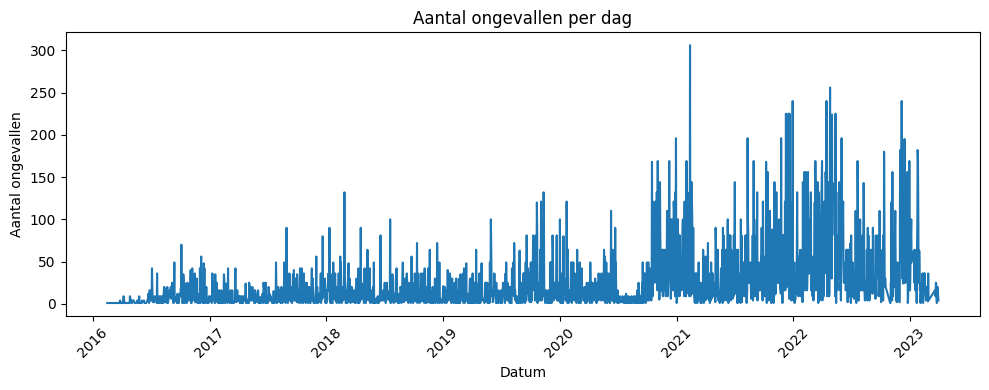

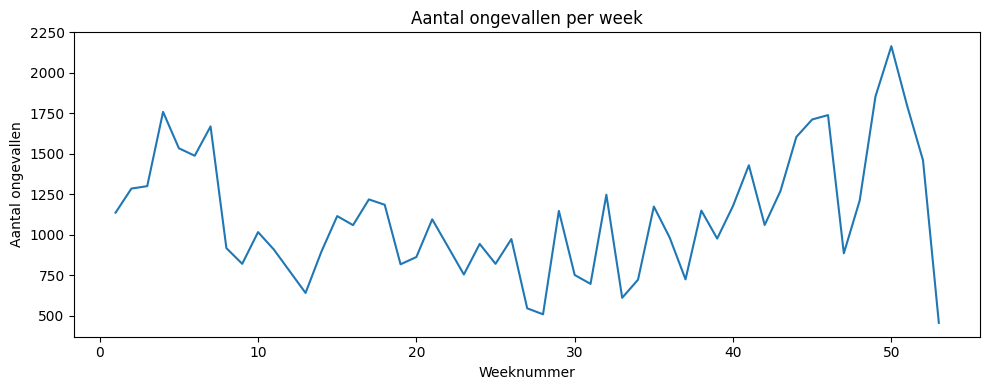

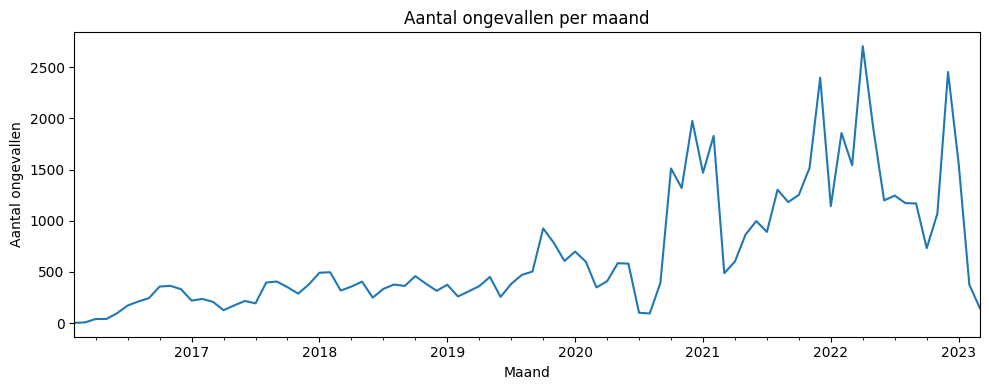

In [27]:
# Extraheer tijdseenheden
df['Dag'] = df['Start_Time'].dt.date
df['Week'] = df['Start_Time'].dt.isocalendar().week
df['Maand'] = df['Start_Time'].dt.to_period('M')

# Dag van de week (naam)
df['DagNaam'] = df['Start_Time'].dt.day_name()

# Maandnaam
df['MaandNaam'] = df['Start_Time'].dt.month_name()

# Groeperen op tijdseenheden
per_dag = df.groupby('Dag').size()
per_week = df.groupby('Week').size()
per_maand = df.groupby('Maand').size()

# Visualisatie: Aantal ongevallen per dag
plt.figure(figsize=(10, 4))
per_dag.plot()
plt.title("Aantal ongevallen per dag")
plt.xlabel("Datum")
plt.ylabel("Aantal ongevallen")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualisatie: Aantal ongevallen per week
plt.figure(figsize=(10, 4))
per_week.plot()
plt.title("Aantal ongevallen per week")
plt.xlabel("Weeknummer")
plt.ylabel("Aantal ongevallen")
plt.tight_layout()
plt.show()

# Visualisatie: Aantal ongevallen per maand
plt.figure(figsize=(10, 4))
per_maand.plot()
plt.title("Aantal ongevallen per maand")
plt.xlabel("Maand")
plt.ylabel("Aantal ongevallen")
plt.tight_layout()
plt.show()

In [28]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,City,County,State,Datum,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Dag,Week,Maand,DagNaam,MaandNaam
0,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,...,False,False,False,False,True,2019-06-12,24,2019-06,Wednesday,June
1,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,...,False,False,False,False,True,2019-06-12,24,2019-06,Wednesday,June
2,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,...,False,False,False,False,True,2019-06-12,24,2019-06,Wednesday,June
3,A-2047758,2,2019-06-12 10:10:56,2019-06-12 10:55:58,30.641211,-91.153481,Zachary,East Baton Rouge,LA,2019-06-12,...,False,False,False,False,True,2019-06-12,24,2019-06,Wednesday,June
4,A-4694324,2,2022-12-03 23:37:14,2022-12-04 01:56:53,38.990562,-77.399070,Sterling,Loudoun,VA,2022-12-03,...,False,False,False,False,False,2022-12-03,48,2022-12,Saturday,December


In [29]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
58953    False
58954    False
58955    False
58956    False
58957    False
Length: 58958, dtype: bool

In [32]:
print("Aantal rijen in accidents:", accidents.shape[0])
print("Aantal rijen in weather:", weather.shape[0])
print("Aantal rijen na merge:", merged_data.shape[0])

Aantal rijen in accidents: 10000
Aantal rijen in weather: 9056
Aantal rijen na merge: 58958
